In [10]:
import ndjson
import os
import json
import random
import math
import re
from functools import partial
from tqdm import tqdm
import matplotlib.pyplot as plt

# The Stack Code

Stack stats:

In [2]:
cumsize = 0
cumtokens = 0
with open("stack-code/stats.json") as f: 
    stats = json.load(f)
    
for key in stats:
    print(key.upper())
    tokens = stats[key]["neox_tokens"]/10**9
    cumtokens += tokens
    print(f"tokens: {tokens:.4f} B")
    size = stats[key]["size"]/10**9
    cumsize += size
    print(f"size: {size:.4f} GB\n")

print("CUMULATIVE:")
print(f"tokens: {cumtokens:.4f} B")
print(f"size: {cumsize:.4f} GB\n")



MATLAB
tokens: 0.0001 B
size: 0.0003 GB

JULIA
tokens: 0.6699 B
size: 1.7519 GB

R
tokens: 0.1243 B
size: 0.2889 GB

SAGE
tokens: 0.0063 B
size: 0.0148 GB

MATHEMATICA
tokens: 0.8235 B
size: 1.7000 GB

MAPLE
tokens: 0.0085 B
size: 0.0154 GB

GAP
tokens: 0.0053 B
size: 0.0126 GB

LEAN
tokens: 0.0695 B
size: 0.1628 GB

ISABELLE
tokens: 0.0393 B
size: 0.0989 GB

PYTHON
tokens: 6.8227 B
size: 21.0366 GB

C
tokens: 0.0254 B
size: 0.0680 GB

C++
tokens: 1.3958 B
size: 4.2658 GB

TEX
tokens: 0.6872 B
size: 2.1816 GB

CUMULATIVE:
tokens: 10.6778 B
size: 31.5977 GB



In [ ]:
pairs = [(key.title(), stats[key]["neox_tokens"]) for key in stats]

pairs = sorted(pairs, key = lambda x: -x[1])

plt.bar([x[0] for x in pairs], [x[1] for x in pairs])
plt.ylabel('Tokens')
plt.yscale('log')
plt.xticks(rotation=-60)
plt.show()

**Problems with the stack**
- Issue: Matlab is wrong. There are only 111 matlab files that match the regex `[a-df-zA-Z]`. Looks like most of the matlab files are just arrays saved as text. Very little of the actual code was captured. 
    - [x] Fix 1: Regex filter to delete arrays
    - [ ] Fix 2: Find rest of matlab files
- Issue: The R data contains MacOS "resource fork" files that aren't related to R at all. 
    - [x] Fix: filter out resource forks
- Issue: .sagews files have a bunch of hashes all over the place.
    - [ ] Fix: figure out how to delete hashes, or render notebooks. 
- Issue: .sage files tend to have a bunch of long strings of hardcode numbers. Is this ok? e.g `ClathomasPrime/CompetitiveStableMatching:Plotting/plots.sage`
- Issue: Wolfram mathematica has three file formats:`.wls`: Wolfram language script, handled ok; `.m`Wolfram language package, handled ok; `.nb`: notebook, the plaintext has a bunch of noise. Need to export as `.wls`. 
    - [ ] Fix: convert notebooks to tex or wls
- Issue: There is one mathematica repo, `dendaxD/QAOA-MaxCut-amplitudes`, that contains about half of all mathematica files in the stack. All these files are extremely similar and should be included on data diversity grounds
    - [x] Fix: filter out this repo. 
- Issue: Some maple files are actually xml
    - [x] Fix: filter out xml
- Issue: Lots of auto-generated tex files in directories called `latex`. 
    - [x] Fix: remove these

Languages the stack does ok:
- Lean is fine
- Julia is fine (possibly want to remove files that meet jsonl spec)
- Python is clean (maybe get rid of Chinese characters?)

I'm not sure if my C/C++ filtering is good at all. Am I getting too many `.h` files?

Do we want Chinese in our Python?

Another issue to consider: Non-latin characters, e.g Chinese

In [1265]:
lang = "python"
with open(f"stack-code/{lang}/0000000.jsonl") as f: 
    ds = ndjson.load(f)

print("len: ", len(ds))

len:  100000


In [1276]:
def print_ex(example): 
    print(text["max_stars_repo_name"])
    print(text["max_stars_repo_path"] + "\n" + "#"*40 + "\n")
    print(text["content"])

In [1266]:
i = 0 
random.shuffle(ds)

In [1277]:
i += 1
text = ds[i]
print(i)
print_ex(text)

10
samesense/chilin
software/mdseqpos/lib/pwmclus_motif_comp.py
########################################

#!/usr/bin/env python
#coding: utf-8

"""Reference: http://nar.oxfordjournals.org/content/early/2013/12/23/nar.gkt1302.full

Created by: Jian Ma 2014-03-15
Modiied by: Jian Ma 2014-04-14
"""
import math
import numpy
import mdseqpos
#import MotifParser as mp

def sum_IC(m1):
    """sum of IC of each column in the matrix
    """
    ic = [IC(t) for t in m1]
    return sum(ic)

def IC(v1):
    """IC of a vector
    """
    total = sum(v1)
    v1 = [t * 1.0 / total for t in v1]
    return 2 + sum([t * math.log(t, 2) for t in v1])

def pcc_vector(v1, v2):
    """Pearson Correlation Coefficient for 2 vectors
    """
    len1 = len(v1)
    len2 = len(v2)
    if len1 != len2:
        return None
    else:
        length = len1
    avg1 = 1.0 * sum(v1) / len(v1)
    avg2 = 1.0 * sum(v2) / len(v2)
    dxy = [(v1[i] - avg1) * (v2[i] - avg2) for i in range(length)]
    dx2 = [(v1[i] - avg1) **

In [1263]:
j = 10
print(ds[j]["max_stars_repo_name"])
print(ds[j]["max_stars_repo_path"])
print(ds[j]["content"])

nicolair/maths-cours
C2195.tex
\input{courspdf.tex}
\debutcours{Approximations des zéros d'une fonction}{alpha}

L'approximation des zéros (ou racines) d'une fonction comporte deux temps : la séparation des racines et l'approximation proprement dite.\newline
La séparation des racines consiste à former des intervalles sur lesquels la restriction de la fonction a de bonnes propriétés et admet une seule racine. Les méthodes proposées ici ne portent que sur les manières de former des valeurs approchées de l'unique zéro dans l'intervalle considéré.\newline
Dans les trois cas, on supposera que la fonction est strictement croissante sur un intervalle $[a,b]$ avec $f(a)<0$ et $f(b)>0$.

\section{Dichotomie}
La méthode de dichotomie repose sur le diagramme suivant et se met en oeuvre très facilement informatiquement. Il est à noter que l'on dispose automatiquement d'une majorations de l'erreur car après $n$ itérations, la racine est entre $a$ et $b$ avec 
\begin{displaymath}
 0<b-a=\frac{b-a}{2

In [1278]:
for x in ds: 
    if x["ext"]=="ipynb":
        print_ex(x)

## Generic Filter Debugging Utilities

We define a utility function to load the full dataset for a given language.

In [6]:
def load_lang_dataset(lang):
    ds = []
    dir = os.path.join("stack-code", lang)
    files = sorted(os.listdir(dir))
    for f in files:
        f = os.path.join(dir, f)
        print(f"Loading: {f}.")
        with open(f) as f:
            ds += ndjson.load(f)
    return ds

We define some generic utilities to filter and visualize datasets.

In [9]:
def example_str(ex):
    """
    A rendering of a data sample as a single Julia string.
    """
    return "\n\n".join([
        "# " + ex["max_stars_repo_name"],
        "# " + ex["max_stars_repo_path"],
        ex["content"]])

def filtered(filter, dataset):
    return [d for d in dataset if filter(d)]

def sorted_by_size(dataset):
    return sorted(dataset, key=lambda x: x["size"], reverse=True)

def save_examples(examples, dir, ext="txt", max_num=None):
    dir = os.path.join("analysis", dir)
    os.makedirs(dir, exist_ok=True)
    for i, d in enumerate(examples):
        print(example_str(d), file=open(os.path.join(dir, f"{i}.{ext}"), "w"))
        if max_num is not None and i >= max_num:
            break

def total_size(ds):
    return sum(d["size"] for d in ds) / 1e9

## Designing the Julia Filter

We first load the full Julia dataset and plot a histogram of file size.

Loading: stack-code/julia/0000000.jsonl.
Loading: stack-code/julia/0000001.jsonl.
Loading: stack-code/julia/0000002.jsonl.
Loading: stack-code/julia/0000003.jsonl.


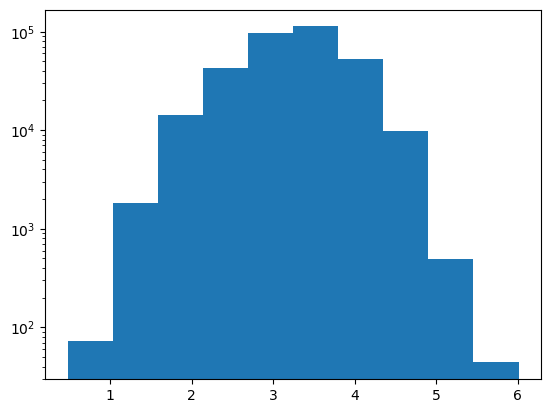

In [11]:
JULIA_DATASET = load_lang_dataset("julia")
plt.hist([math.log10(d["size"]) for d in JULIA_DATASET], log=True)
plt.show()

We can now define the current Julia filter being proposed.

In [12]:
def julia_test_file(ex, ratio=0.1):
    # Whether a file has some minimum ratio of @test statements
    txt = ex["content"]
    kwd = "@test"
    nlines = txt.count("\n") + 1
    return kwd in txt and (txt.count(kwd) / nlines >= ratio)

def julia_numerical_density(ex):
    # The ratio of digit characters over non-digit characters in the file
    txt = ex["content"]
    ntoks = sum(txt.count(c) for c in "0123456789")
    return ntoks / len(txt)

def generated_file(ex):
    #This heuristic happens to be superfluous
    return "generated" in ex["max_stars_repo_name"] or ex["max_stars_repo_name"][0] == "."

def julia_filter(ex):
    if ex["content"][0] in ["%", "{", "["]:
        # Eliminates non-Julia files such as JSON lines (.jl) files 
        return False
    elif ex["size"] >= 1e5:
        # Overly large files are often auto-generated boilerplate and/or mostly
        # contain large arrays of numbers.Thus, we reject such large files unless
        # unless they are test files with low numerical density.
        return julia_test_file(ex) and julia_numerical_density(ex) <= 0.5
    else:
        return True

In [13]:
# A list of keywords that make a Julia file interesting
julia_whitelist = [
    # Popular packages for scientific computing
    "LinearAlgebra",
    "DifferentialEquations",
    "Symbolics",
    "Distributions",
    "DataFrames",
    "DynamicalSystems",
    "Turing",
    "Gen",
    "JuMP",
    # Standard mathematical functions
    "sqrt",
    "abs",
    "zeros",
    "ones",
    "sin",
    "cos",
    "tan",
    "log",
    "exp",
    "integrate",
    "likelihood",
    "Matrix",
    "π",
    "pi",
    "rand",
    "grad"
]

julia_whitelist_rexp = re.compile("|".join("(\\W" + kwd + "\\W)" for kwd in julia_whitelist))

def julia_filter_strict(ex):
    return julia_filter(ex) and julia_whitelist_rexp.search(ex["content"])

In [14]:
# Computing the strict filtered dataset is a bit slow
# This should take about 5-10 minutes.

JULIA_DATASET_FILTERED = filtered(julia_filter, JULIA_DATASET)
JULIA_DATASET_FILTERED_STRICT = filtered(julia_filter_strict, JULIA_DATASET)

print(f"Total: {total_size(JULIA_DATASET):.2f}GB")
print(f"Filtered: {total_size(JULIA_DATASET_FILTERED):.2f}GB")
print(f"Filtered strict: {total_size(JULIA_DATASET_FILTERED_STRICT):.2f}GB")

Total: 1.50GB
Filtered: 1.50GB


In [15]:
def save_julia_filtered_examples():
    dataset_shuffled = JULIA_DATASET_FILTERED.copy()
    random.shuffle(dataset_shuffled)
    dataset_sorted = sorted_by_size(JULIA_DATASET_FILTERED)
    save_examples(dataset_shuffled, "shuffled", max_num=100, ext="jl")
    save_examples(dataset_sorted, "largest", max_num=100, ext="jl")
    save_examples(JULIA_DATASET_FILTERED_STRICT, "strict", max_num=100, ext="jl")

save_julia_filtered_examples()